# Customer Spending

This Data Science Project predicts customer spending rating on a scale of 1 to 100 based on a number of factors such as age, gender, career, income etc.

From this model a shopkeeper can tell long term and short term customers given the information on how frequent they buy from the shop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
# load the dataset
dataset = pd.read_csv("Customers.csv")
df = pd.DataFrame(dataset)
df

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Spending Score (1-100)
0,1,Male,19,15000,Healthcare,1,4,39
1,2,Male,21,35000,Engineer,3,3,81
2,3,Female,20,86000,Engineer,1,1,6
3,4,Female,23,59000,Lawyer,0,2,77
4,5,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,Artist,8,7,40
1996,1997,Female,91,73158,Doctor,7,7,32
1997,1998,Male,87,90961,Healthcare,9,2,14
1998,1999,Male,77,182109,Executive,7,2,4


## Preparing and Exploring Data 

In [4]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1], "\n")
print("Subset of the dataset: \n", df.head(), "\n")

Rows:  2000
Columns:  8 

Subset of the dataset: 
    CustomerID  Gender  Age  Annual Income ($)     Profession  Work Experience  \
0           1    Male   19              15000     Healthcare                1   
1           2    Male   21              35000       Engineer                3   
2           3  Female   20              86000       Engineer                1   
3           4  Female   23              59000         Lawyer                0   
4           5  Female   31              38000  Entertainment                2   

   Family Size  Spending Score (1-100)  
0            4                      39  
1            3                      81  
2            1                       6  
3            2                      77  
4            6                      40   



In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,4.102500,3.768500,50.962500
std,577.494589,28.429747,45739.536688,3.922204,1.970749,27.934661
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,500.750000,25.000000,74572.000000,1.000000,2.000000,28.000000
50%,1000.500000,48.000000,110045.000000,3.000000,4.000000,50.000000
75%,1500.250000,73.000000,149092.750000,7.000000,5.000000,75.000000
max,2000.000000,99.000000,189974.000000,17.000000,9.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
 7   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
# fill missing values
train_mode = dict(df.mode().iloc[0])
df = df.fillna(train_mode)
print(train_mode)

{'CustomerID': 1, 'Gender': 'Female', 'Age': 31.0, 'Annual Income ($)': 9000.0, 'Profession': 'Artist', 'Work Experience': 1.0, 'Family Size': 2.0, 'Spending Score (1-100)': 49.0}


In [9]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Profession                0
Work Experience           0
Family Size               0
Spending Score (1-100)    0
dtype: int64


## Saving Figures as png Images
Below is an extra code that will save plot figures as png image files

In [16]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Check for Duplicate Values

In [12]:
print(df.duplicated().any())
duplicated_data = df.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

False
Number of duplicated data:  0


### Correlation

Correlation
Spending Score (1-100)    1.000000
Annual Income ($)         0.023299
CustomerID                0.018936
Family Size               0.002232
Work Experience          -0.028948
Age                      -0.041798
Name: Spending Score (1-100), dtype: float64


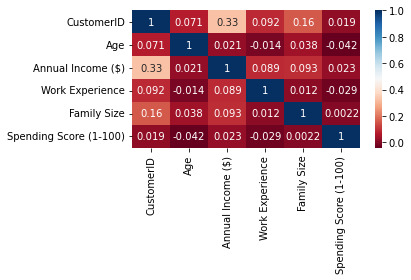

In [17]:
# check for correlation
import seaborn as sns

print("Correlation")
print(df.corr()["Spending Score (1-100)"].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
save_fig("correlation")
plt.show()

### Data Visualization

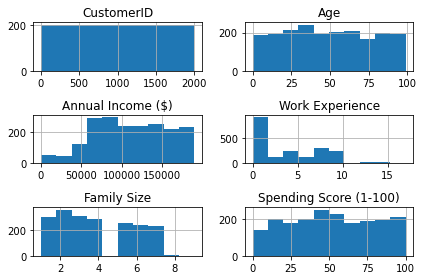

In [18]:
# Plot a histogram to visualize the dataset
df.hist()
save_fig("customers_data_visualization")
plt.show()

from the histograms above, work experience is positively skewed evident by tail on the right side of the distribution, family size is bimodal, as shown with two distict peaks while spending score and annual income are random due to no presence of any informative pattern.

In [21]:
# convert categoricals
encoders = {}
for column in ["Gender", "Profession"]:
    categorical_convert = LabelEncoder()
    df[column] = categorical_convert.fit_transform(df[column])
    encoders[column] = categorical_convert

### Splitting the Dataset

In [22]:
x_cols = [c for c in df.columns if c != "Spending Score (1-100)"]
# set input matrix and target column
X = df[x_cols]
y = df["Spending Score (1-100)"]

In [23]:
print(X)
print(y)

      CustomerID  Gender  Age  Annual Income ($)  Profession  Work Experience  \
0              1       1   19              15000           5                1   
1              2       1   21              35000           2                3   
2              3       0   20              86000           2                1   
3              4       0   23              59000           7                0   
4              5       0   31              38000           3                2   
...          ...     ...  ...                ...         ...              ...   
1995        1996       0   71             184387           0                8   
1996        1997       0   91              73158           1                7   
1997        1998       1   87              90961           5                9   
1998        1999       1   77             182109           4                7   
1999        2000       1   90             110610           3                5   

      Family Size  
0      

## Training the Model

### Linear Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1600, 7)
(1600,)


In [27]:
linear_regressor = LinearRegression()

# fitting the dataset
model = linear_regressor.fit(X_train, y_train)

# prediction
prediction = linear_regressor.predict(X_test)
print(prediction)

print("Train score: ", linear_regressor.score(X_train, y_train))
print("Test score: ", linear_regressor.score(X_test, y_test))

# prediction on new data values
# prediction = linear_regressor.predict([])
# print("The predicted spending score is: ", prediction)

[50.05655041 48.84014039 49.52018711 46.48038629 46.28367931 53.53464018
 53.49436364 54.97270925 51.96632025 52.06170985 46.11255862 53.44618592
 53.11263105 44.7266177  49.92592837 46.85797998 57.90341535 50.99403222
 52.30085086 51.24228741 51.45935039 48.14161246 52.46186792 56.61988533
 45.63509245 52.77773595 47.40977597 47.24368627 50.59755055 51.39434433
 50.39487553 52.91390004 51.5086936  54.199768   48.51127628 49.16677704
 49.14192557 50.55030098 51.78290768 49.38221711 48.15304925 48.7560067
 50.58335511 51.17949078 49.60381321 49.20116044 50.58285155 45.76149253
 46.52858361 56.01287356 54.81985512 52.56953539 52.48497609 43.79949933
 47.62935284 51.35798161 51.34826914 48.02480509 47.28736502 48.35889608
 51.14722516 50.66417869 49.88857975 51.19699062 50.94283257 51.03148463
 53.5550627  51.8740285  54.1993434  54.12690569 52.41971197 58.10022175
 54.8717273  52.67489881 50.06618481 50.46052506 49.6861577  52.52594998
 45.92998819 51.25402967 50.06695393 46.57369547 53.

### Support Vector Machine Algorithm

In [28]:
svm = SVR(kernel="rbf", C=100.0)

# fitting data
svm.fit(X_train, y_train)

# prediction
prediction = svm.predict(X_test)
print(prediction)

print("Train score: ", svm.score(X_train, y_train))
print("Test score: ", svm.score(X_test, y_test))

[50.841375   49.45516043 52.24851413 51.8177066  49.73799239 51.95224766
 51.73507705 50.77805266 47.99111141 49.49845279 49.19557908 48.88715401
 51.03513353 51.57717173 52.351764   48.89623355 50.82899953 48.31758889
 52.24814047 51.05094232 49.77086191 48.94866564 52.01539206 50.75449368
 48.9483375  49.63556817 49.86826107 52.23548114 51.99601597 48.14566918
 52.07740744 49.10220517 49.45239064 51.44438239 51.81064528 50.05727541
 51.70005755 48.64761608 52.2203949  48.16821708 48.02316098 51.93204024
 48.37115159 48.47160424 49.77145285 50.76334508 50.05141524 48.76562516
 50.29709415 52.19295365 51.11638065 47.92177092 52.1568571  48.00306567
 50.95622417 51.92330674 49.30460637 50.8431559  51.19845303 48.81521953
 49.77681345 49.56031196 49.65678149 48.34729339 48.27723245 52.15118937
 49.04269656 48.94609444 48.18164992 50.03678681 51.6195733  49.13351287
 50.98836125 51.0026872  49.95292331 51.01381843 48.84329018 51.22014594
 51.24790896 49.18983788 50.68454629 51.83685118 52

### Random Forest Algorithm

In [29]:
regressor = RandomForestRegressor()

# fitting dataset
model = regressor.fit(X_train, y_train)

# prediction
prediction = regressor.predict(X_test)
print(prediction)

print("Train score: ", regressor.score(X_train, y_train))
print("Test score: ", regressor.score(X_test, y_test))

[45.84 53.23 41.83 56.19 41.51 53.8  62.66 47.96 54.57 66.85 46.4  57.29
 63.72 48.74 72.   51.18 64.69 48.22 45.6  49.75 49.17 58.42 80.94 59.62
 43.01 43.72 43.74 37.68 41.54 60.1  44.54 43.42 50.01 60.59 44.93 55.14
 46.95 59.17 52.17 38.67 51.8  55.65 65.91 52.68 41.91 37.42 50.92 45.7
 55.85 52.11 45.91 60.81 60.26 59.12 38.56 67.97 46.06 54.71 39.6  58.1
 51.91 61.81 41.37 47.21 60.5  41.85 54.58 38.71 49.76 53.22 66.31 44.78
 45.78 44.51 41.66 37.19 38.61 44.18 66.2  50.91 63.3  41.93 61.43 54.78
 68.73 60.24 56.13 42.4  44.83 37.98 56.47 46.23 51.69 55.4  60.58 47.26
 52.31 48.55 46.58 56.34 59.06 42.81 39.35 47.09 61.67 51.96 51.97 54.14
 60.05 49.93 54.35 54.52 45.33 51.65 49.39 53.19 49.2  46.17 54.08 45.52
 45.03 39.15 50.29 53.84 65.6  56.62 48.06 52.33 57.74 60.36 53.32 51.02
 59.56 58.19 48.38 49.21 62.88 53.2  55.45 53.27 60.42 61.95 41.63 53.37
 42.83 57.88 64.3  49.98 58.24 54.39 52.25 46.87 54.96 49.44 52.91 50.57
 54.39 54.31 51.89 47.5  39.23 67.18 42.34 47.01 71.7

### Decision Tree Algorithm

In [30]:
regressor_2 = DecisionTreeRegressor()

# fitting dataset
model = regressor_2.fit(X_train, y_train)

# prediction
prediction = regressor_2.predict(X_test)
print(prediction)

print("Train score: ", regressor_2.score(X_train, y_train))
print("Test score: ", regressor_2.score(X_test, y_test))

[ 73.  51. 100.  79.  46.  75.  97.  40.  88.  33.  47.  76.  95.  22.
  99.  91.  84.  46.  22.  51.  48.  84.  97.  59.  46.   5.   4.   3.
  29.  72.  58.  88.  16.  86.  13.  92.  50.  79.  88.  58.  34.  83.
  80.  31.  49.  32.  81.  19.  56.  78.  44.  82.  36.  14.  57.  77.
  11.  84.  21.  96.  87.  94.   5.  30.  38.  21.   1.  48.  46.   7.
  90.  78.  24.  70.  26.  50.  22.  27.  38.  62.  42.  24. 100.   4.
  71.  65.  53.  20.  57.   3.  60.  36.   0.  91.  90.   2.  49.  18.
  90.  64.  85.  37.  25.  82.  99.  84.  20.  62.  21.  60.  86.  87.
  54.  69.  77.  25.  65.  35.  73.  46.  93.  88.  91.   3.  98.  59.
  53.  11.  69.  83.  50.  73.  92.  87.  48.  80.  78.  23.  46.  96.
  49.  38.  13.  37.  22.  91.  43.  19.  14.  75.  22.   1.  45.  70.
  39.  42.  84.  92.  16.  77.  77.  42.  52.  18.  78.  54.  34.  83.
  63.  73.  72.  94.   4.  77.  29.  74.  13.  83.  34. 100.  36.  36.
  73.  12.  50.  65.  92.  37.   5.   8.  40.  16.  45.  14.  86.  21.
  17. 